In [1]:
import pandas as pd
import numpy as np

In [2]:
#pip install pandas

In [3]:
df= pd.read_csv(r"C:/Users/harshit/Desktop/CarDekho/cardata.csv")

In [4]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

# Performing EDA

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
final_dataCol=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
final_dataCol['current_year']=2020 #considering current year as 2020

In [10]:
final_dataCol['total_used_year']=final_dataCol['current_year']-final_dataCol['Year']

In [11]:
final_dataCol.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,total_used_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [12]:
#final_dataCol.drop(['Year'],axis=1,inplace=True)
final_dataCol.drop(['current_year'],axis=1,inplace=True) #inplace to perm delete

In [13]:
final_dataCol=pd.get_dummies(final_dataCol,drop_first=True) #perform onehot encoding to convert string to int for computation and also use ddummy variable trap

In [14]:
final_dataCol.drop(['Year'],axis=1,inplace=True)

In [15]:
final_dataCol.corr() 

,Selling_Price,Present_Price,Kms_Driven,Owner,total_used_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
total_used_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


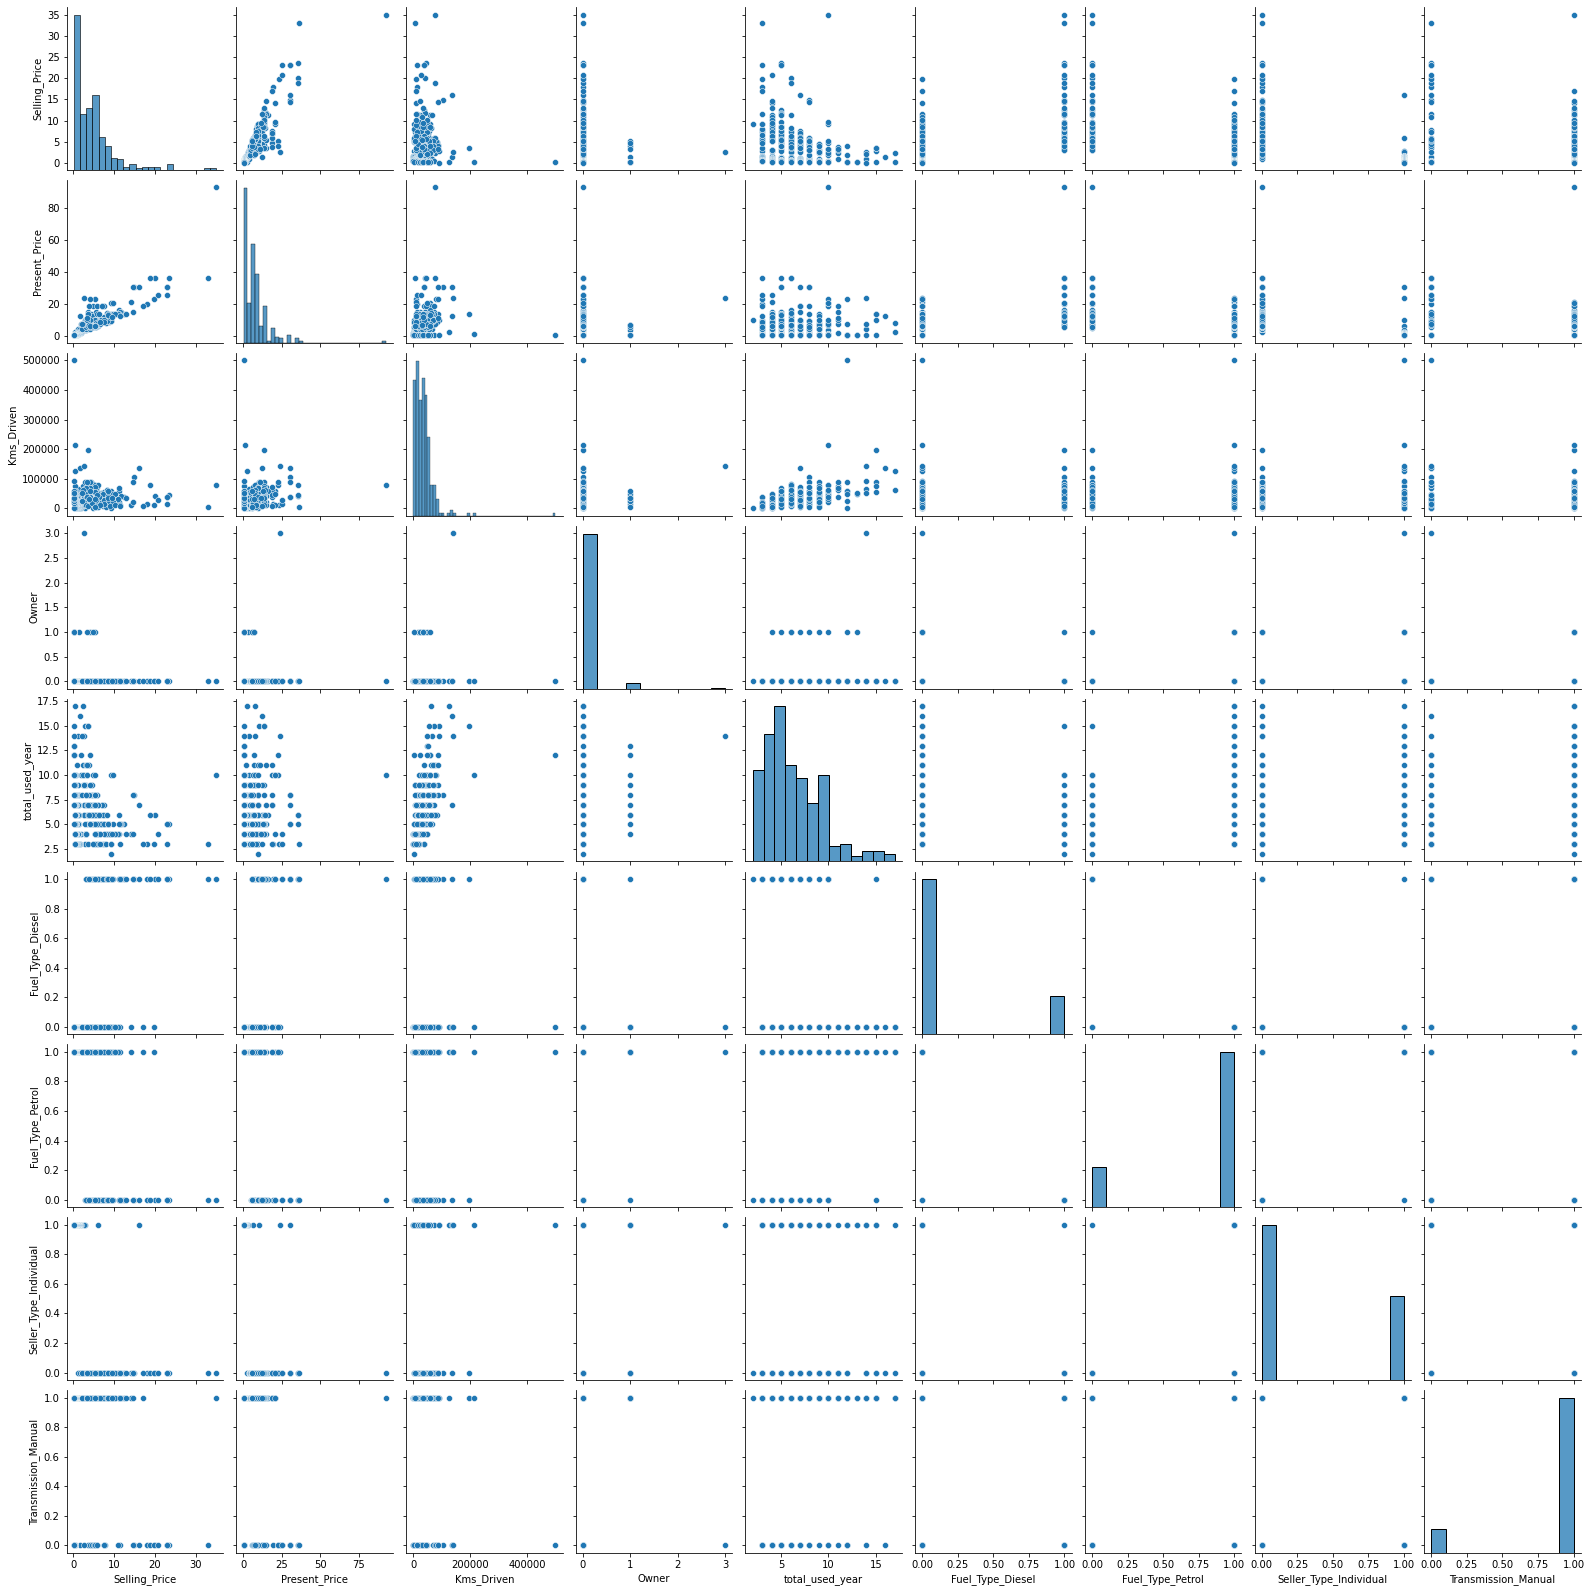

In [16]:
#pip install seaborn
import seaborn as sns
sns.pairplot(final_dataCol)

In [17]:
#final_dataCol['log_Selling_Price']=pd.Series(np.log(final_dataCol['Selling_Price'])) #try to normalise selling price
final_dataCol['log_Present_Price']=pd.Series(np.log(final_dataCol['Present_Price'])) #try to normalise Present price


final_dataCol.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,total_used_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,log_Present_Price
0,3.35,5.59,27000,0,6,0,1,0,1,1.720979
1,4.75,9.54,43000,0,7,1,0,0,1,2.255493
2,7.25,9.85,6900,0,3,0,1,0,1,2.287471
3,2.85,4.15,5200,0,9,0,1,0,1,1.423108
4,4.60,6.87,42450,0,6,1,0,0,1,1.927164


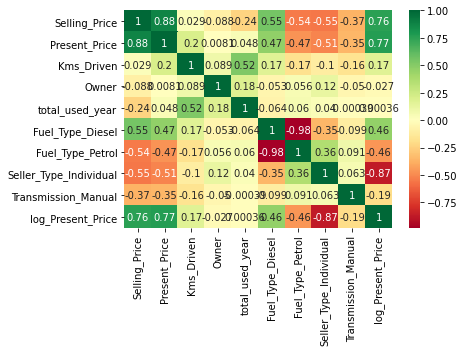

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=final_dataCol.corr()
#print(corrmat)
top_corr=corrmat.index
#print(top_corr)
#plt.figure()
g=sns.heatmap(final_dataCol[top_corr].corr(),annot=True, cmap="RdYlGn")

In [19]:
# to find selling price and take antilog
#indep and depend feature
#final_dataCol.drop(['Year'],axis=1,inplace=True)
#final_dataCol.drop(['log_Selling_Price'],axis=1,inplace=True)
final_dataCol.head()
x=final_dataCol.iloc[:,1:]
y=final_dataCol.iloc[:,0]



In [20]:
#feature importance using regresser model to understand different features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.28448783 0.03775927 0.000592   0.08340596 0.14349042 0.02086876
 0.08254792 0.06577983 0.28106804]


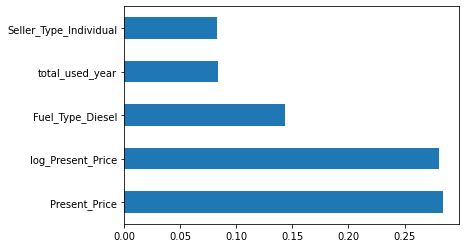

In [21]:
feat_imp=pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(5).plot(kind="barh")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()


In [24]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=10)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [29]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24, total=   1.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24, total=   0.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=24 
[CV]  n_estimators=500, min_samples_spli

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
#print(rf.r2_score(X_test, y_test))

AttributeError: 'RandomForestRegressor' object has no attribute 'r2_score'

[ 0.69137667  3.81860321  5.46111268  0.63894067  4.66081701  1.2636414
  3.32628135  2.94220476  2.51840833 10.96153528  5.20516596  5.17221766
  0.35295155  0.20815611  0.46526706 11.72438211  1.15974873  4.84312262
  9.90123424  7.91604992  3.48600794  4.69307494  0.25051421  7.08514693
  2.44509008  0.39838182 23.81008867  1.55488889  4.30511818  0.16707504
  2.96825476  6.93754457  0.51529048  0.75857337  2.62709226  0.36396885
  3.89272266  0.34199622  4.19557792  0.48043075  1.30150524  0.46728437
  5.2422322   3.39106488  9.697514    9.62209127  5.03026319  5.89179861
 17.57628115  0.49220508 10.52387865  6.50160089  0.7658444   1.97054187
  0.52929694  0.46728437  6.82845786  1.17770584  4.12597409  0.24555798
  3.81513984]


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

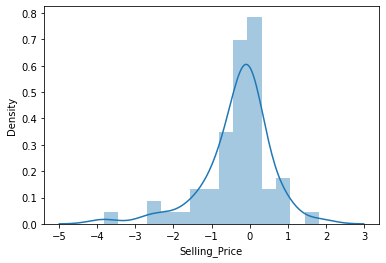

In [37]:
predictions=rf_random.predict(X_test)
print(predictions)
#print(predictions.oob_score_)
sns.distplot(y_test-predictions)

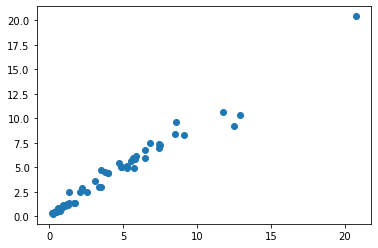

In [80]:
plt.scatter(y_test,predictions)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('acc:', np.sqrt(metrics.r2_score(y_test, predictions)))

MAE: 0.5810605669311937
MSE: 0.8775100309416012
RMSE: 0.9367550538649905
acc: 0.9720001266970537


In [39]:
import pickle
file = open('C:/Users/harshit/Desktop/CarDekho/random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)

In [84]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
